In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition 



In [2]:

data = fetch_olivetti_faces(shuffle=True,random_state=10)
data = data.images.reshape((len(data.images), -1))


downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /home/hamid/scikit_learn_data


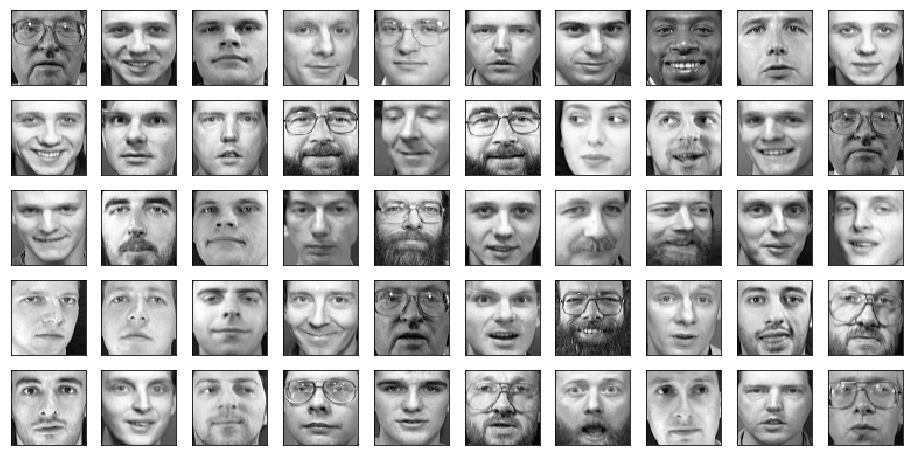

In [3]:
fig = plt.figure(figsize=(16, 8))
image_shape = (64, 64)

for  i in range(50):
    plt.subplot(5, 10, i + 1) # It starts with one
    plt.imshow(data[i].reshape(image_shape), cmap=plt.cm.gray,interpolation="nearest")
    
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);

In [4]:
n_eigenfaces = 16
pca = decomposition.PCA(svd_solver='randomized',n_components=n_eigenfaces)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

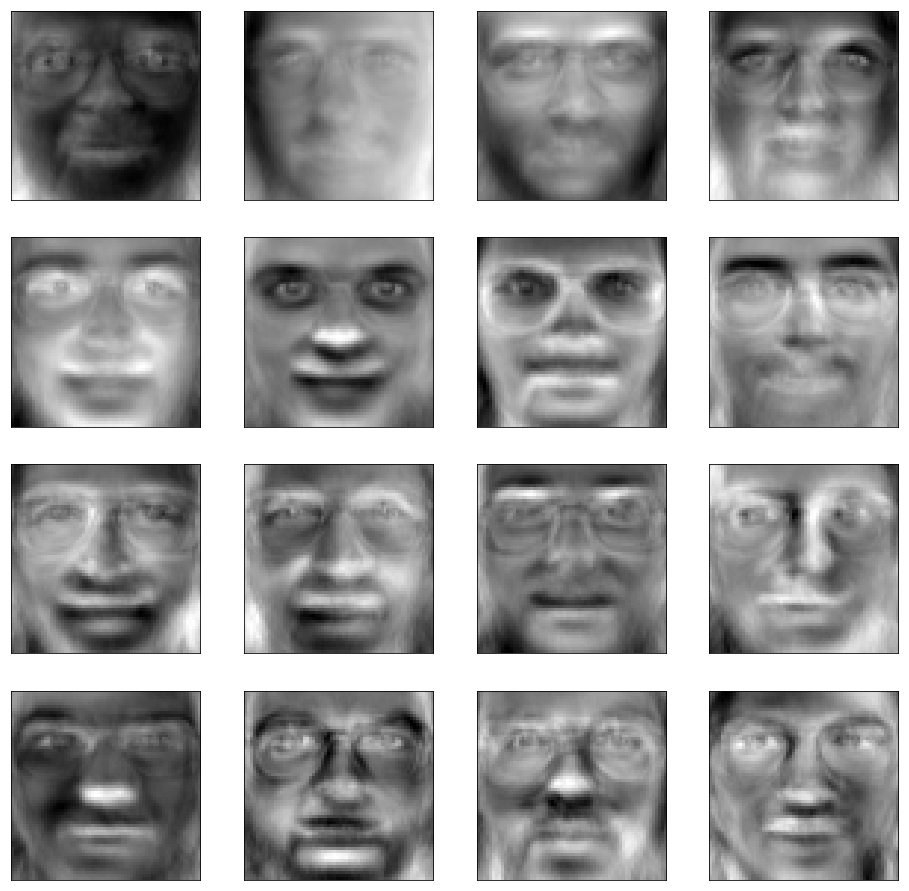

In [5]:
plt.figure(figsize=(16, 16));
for j in range(pca.components_.shape[0]):
    plt.subplot(4, 4, j + 1)
    plt.imshow(pca.components_[j].reshape(image_shape), cmap=plt.cm.gray,interpolation="nearest")
    
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);

[ 18.79307536  11.04408268   6.28885319   3.94469763   2.84890252
   2.49146568   1.91526311   1.60713097   1.54534935   1.31964341
   1.25895363   1.1340679    0.98393168   0.90532085   0.8388259
   0.77161972   0.72532504   0.64365279   0.59495991   0.58952254
   0.55131955   0.48506611   0.46083671   0.44962654   0.43105396
   0.41974029   0.40550404   0.39131853   0.36118853   0.34817804
   0.31725655   0.30319646   0.28564228   0.26400733   0.25283313
   0.24939442   0.240802     0.23563826   0.22257881   0.21615663
   0.20479931   0.20036889   0.1928315    0.18908162   0.18205681
   0.17860264   0.1751548    0.17380825   0.16438429   0.16142685
   0.15472453   0.15041342   0.14544081   0.13955918   0.13813339
   0.13542318   0.1305802    0.12820968   0.12579146   0.12151834
   0.12072291   0.1163245    0.11441761   0.10953197]


([<matplotlib.axis.XTick at 0x7fc10339c3d0>,
 <a list of 13 Text xticklabel objects>)

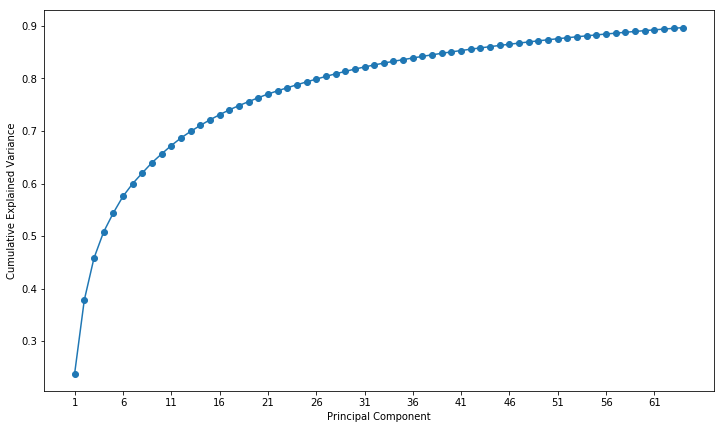

In [6]:
n_eigenfaces = 64
# Creating PCA object
pca = decomposition.PCA(svd_solver='randomized',n_components=n_eigenfaces)
# We are applying PCA to the data
pca.fit(data)
# We are applying PCA to the data
print(pca.explained_variance_)
plt.figure(figsize=(12,7))
plt.plot(range(1, 65), pca.explained_variance_ratio_.cumsum(), '-o')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Principal Component')
#plt.xlim(0.75,4.25)
#plt.ylim(0,1.05)
plt.xticks(range(1, 65,5))

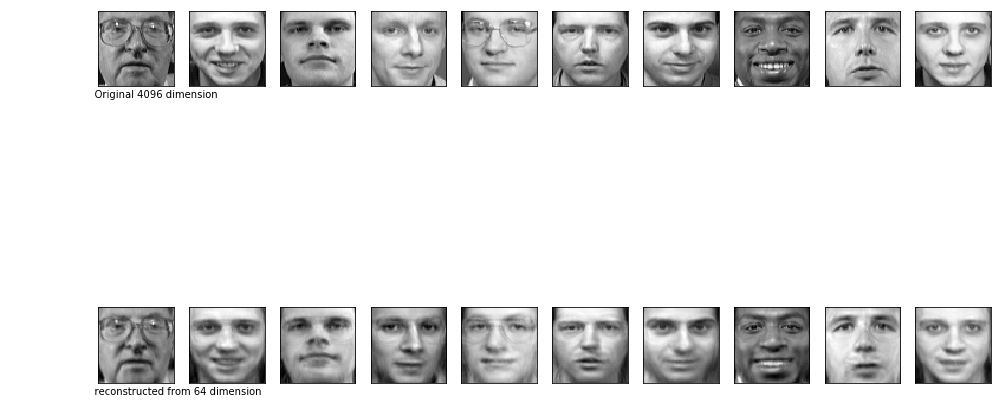

In [7]:
components = pca.transform(data)
projected = pca.inverse_transform(components)


fig, ax = plt.subplots(2, 10, figsize=(16, 10),
                       subplot_kw={'xticks':[], 'yticks':[]})

for i in range(10):
    ax[0, i].imshow(data[i].reshape(image_shape), cmap=plt.cm.gray,interpolation="nearest")
    ax[1, i].imshow(projected[i].reshape(image_shape), cmap=plt.cm.gray,interpolation="nearest")
    
ax[0, 0].set_xlabel('             Original 4096 dimension',ha='center')
ax[1, 0].set_xlabel('                            reconstructed from 64 dimension ');
